In [11]:
from IPython.display import display
import pandas as pd

redwine = pd.read_csv('red-wine.csv')

df_train = redwine.sample(frac=0.7,random_state=0)
df_valid = redwine.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

xtrain = df_train.drop('quality',axis=1)
xvalid = df_valid.drop('quality',axis=1)
ytrain = df_train['quality']
yvalid = df_valid['quality']

from tensorflow import keras
from tensorflow.keras import layers,callbacks # type: ignore

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
    )

history = model.fit(
    xtrain,ytrain,
    validation_data=(xvalid,yvalid),
    batch_size=256,
    callbacks=[early_stopping],
    verbose=0
)

history_df = pd.DataFrame(history.history)
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.13828736543655396


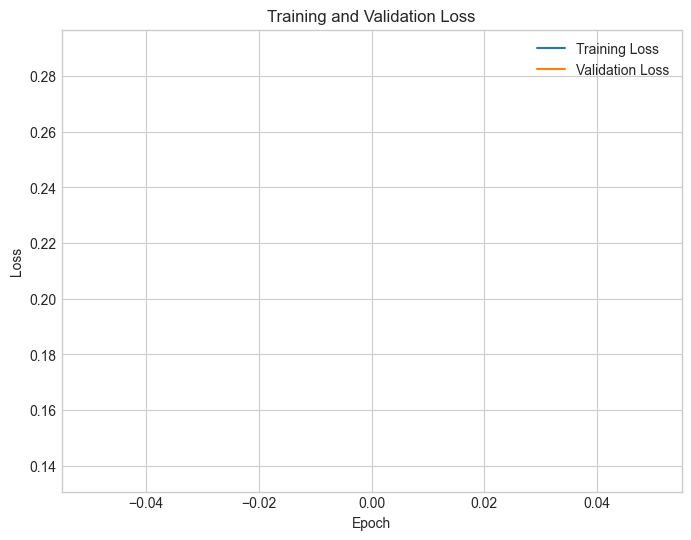

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' is the result of model.fit()
history_df = pd.DataFrame(history.history)

# Plotting the loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_df.index, history_df['loss'], label='Training Loss')
plt.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()